<a href="https://colab.research.google.com/github/MarioMuondo/baseYolo/blob/main/reconhecimento_faces_colab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento Facial com TensorFlow + MTCNN + KNN
Este notebook detecta e reconhece rostos com imagens de exemplo.

In [3]:
from google.colab import files
uploaded = files.upload()


Saving reconhecimento_faces_projeto.zip to reconhecimento_faces_projeto.zip


In [5]:
import zipfile
import os

zip_path = "reconhecimento_faces_projeto.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

print(os.listdir("faces"))
print(os.listdir("test"))


['ana.jpg', 'maria.jpg', 'joao.jpg']
['grupo.jpg']


In [1]:
!pip install deepface
!pip install opencv-python-headless


Base de dados carregada:
- Ana: faces/ana.jpg
- Maria: faces/maria.jpg
- Joao: faces/joao.jpg
25-08-06 21:36:35 - Found 3 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/3 [00:00<?, ?it/s]

25-08-06 21:36:40 - 🔗 vgg_face_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5 to /root/.deepface/weights/vgg_face_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  0%|          | 524k/580M [00:00<03:56, 2.45MB/s]
  0%|          | 2.62M/580M [00:00<01:00, 9.59MB/s]
  2%|▏         | 9.44M/580M [00:00<00:18, 30.3MB/s]
  2%|▏         | 13.6M/580M [00:00<00:24, 23.2MB/s]
  4%|▎         | 21.5M/580M [00:00<00:20, 26.8MB/s]
  5%|▍         | 28.8M/580M [00:01<00:15, 36.3MB/s]
  6%|▌         | 33.6M/580M [00:01<00:16, 33.9MB/s]
  7%|▋         | 41.4M/580M [00:01<00:12, 43.7MB/s]
  8%|▊         | 46.7M/580M [00:01<00:14, 37.7MB/s]
  9%|▉         | 53.0M/580M [00:01<00:14, 35.6MB/s]
 10%|█         | 60.3M/580M [00:01<00:12, 43.3MB/s]
 11%|█▏        | 65.5M/580M [00:01<00:12, 40.9MB/s]
 13%|█▎        | 73.4M/580M [00:02<00:10, 49.4MB/s]
 14%|█▎        | 79.2M/580M [00:02<00:12, 40.7MB/s]
 15%|█▍        | 84.4M/580M [00:02<00:13, 36.2MB/s]
 16%|█▌        | 92.8

25-08-06 21:37:00 - There are now 3 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
25-08-06 21:37:00 - Searching temp_face.jpg in 3 length datastore
25-08-06 21:37:01 - find function duration 25.268197298049927 seconds


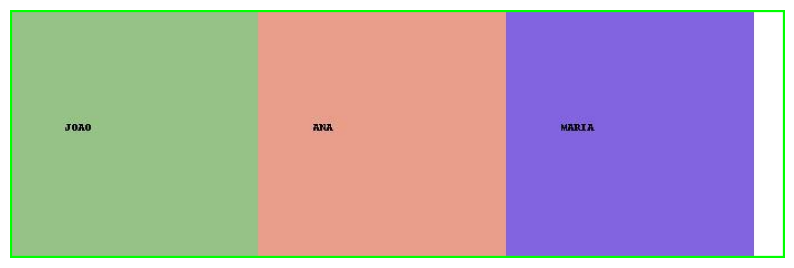

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace

# Caminhos
faces_dir = "faces"
test_image_path = "test/grupo.jpg"

# Carrega imagens de treino e rótulos
db = {}
for filename in os.listdir(faces_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        label = os.path.splitext(filename)[0].capitalize()
        img_path = os.path.join(faces_dir, filename)
        db[label] = img_path

# Mostra as imagens na base
print("Base de dados carregada:")
for name, path in db.items():
    print(f"- {name}: {path}")

# Carrega imagem de teste
img = cv2.imread(test_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detecta faces e reconhece com DeepFace
results = DeepFace.extract_faces(img_path = test_image_path, detector_backend='mtcnn', enforce_detection=False)

for face_data in results:
    facial_area = face_data['facial_area']
    x = facial_area['x']
    y = facial_area['y']
    w = facial_area['w']
    h = facial_area['h']

    face_crop = img[y:y+h, x:x+w]
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Salva temporariamente a imagem da face
    face_filename = "temp_face.jpg"
    cv2.imwrite(face_filename, face_crop)

    # Compara com a base
    result = DeepFace.find(img_path=face_filename, db_path=faces_dir, model_name='VGG-Face', enforce_detection=False)

    # Obtém o nome mais próximo
    if not result[0].empty:
        identity = os.path.basename(result[0].iloc[0]['identity']).split(".")[0].capitalize()
    else:
        identity = "Desconhecido"

    cv2.putText(img_rgb, identity, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

# Exibe resultado
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
